# TSIA202a - Second Practice Session : Spectral density estimation and periodogram
The goal of this second session is to provide a power spectral density estimator of a real, zero-mean, weakly stationary process $X_t$. We suppose that we have access to $n$ observations and we will use the FFT algorithm (that implements the DFT) using `numpy.fft.module`.
Recall (from the course) that the periodogram of the observations $X_0, \dots, X_{n-1}$ can be given as:
$$
I_n(\lambda) = \frac{1}{2\pi n}|\sum_{k=0}^{n-1} X_k e^{i\lambda k}|^2
$$

Moreover, the Hertglotz theorem provides a relation between the empirical autocovariance $\hat{\gamma}_n$ and the periodogram $I_n$:
$$
\hat{\gamma}_n(k) = \int_{0}^{2\pi}e^{i\lambda k}I_n({\lambda})d\lambda
$$

1. For a given $m \geq n$  we denote also the DFT as:
$$
DFT(X,m)(k) = \sum_{h=0}^{n-1}X_he^{-2i\pi\frac{kh}{m}}
$$
Show the following relation: 
$$I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n} |DFT(X,m)(k)|^2$$
2. provide a script that compute those $I_n(\frac{2\pi k}{m})$ for the time series mentioned in the first practice session
3. Show that $I_n(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{\gamma}_n(k)e^{-i\lambda k}$
4. How to choose $m$ in order to get a simple relation between $\hat{\gamma}_n(k)$ and $I_n(\frac{2\pi k}{m})$ ? At the end, given a specific $\tilde{m}$ show that:
$$
\hat{\gamma}_n(k) = \frac{1}{n} IDFT\left(\left|DFT(X, \tilde{m})\right|^2, \tilde{m}\right)(k)
$$ Try this estimator on the autocovariance of previous time series of the first session.

5. In the case of white noise, estimate the variance of the periodogram for several values of $n$ and discuss about it.




# Solution

1. Proof $I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n} |DFT(X,m)(k)|^2$

Let $\lambda = \frac{2k\pi}{m}$,
$$I_n(\lambda) = \frac{1}{2\pi n} \left| \sum_{h=0}^{n-1} X_h e^{i\frac{2\pi k}{m}h} \right|^2 =  \frac{1}{2\pi n} \left| \overline{\sum_{h=0}^{n-1} X_h e^{-i\frac{2\pi k}{m}h}} \right|^2 = \frac{1}{2\pi n} \left| DFT(X,m)(k) \right| ^2 $$

In [22]:
# import libraries

import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.signal as ss

# define funcitons in first practice session
def generate_data_White_noise(T,mu,sigma):
    X = np.random.normal(loc=0, scale=np.sqrt(sigma), size=T)
    return X

def generate_data_Xt(T, mu, sigma, a, b):
    noise = generate_data_White_noise(T, mu, sigma)
    X = []
    for i in range(1,T):
        X.append(a + b * noise[i] + noise[i-1])
    return X

def generate_data_Xt2(T, mu, sigma, a, K):
    X = []
    noise = generate_data_White_noise(T, mu,sigma)
    for i in range(K):
        term = 0
        for k in range(K):
            term = term + 2**(-k) * noise[i-k]
        X.append(term + a)
    return X

# define function of periodogram
def calculate_periodogram(X,m):
    DFT_X = np.fft.fft(X,m)
    In = (1 / (2 * math.pi * len(DFT_X))) * np.abs(DFT_X)**2
    freq_values = np.fft.fftfreq(m)
    return freq_values, In


2. provide a script that compute those $I_n(\frac{2\pi k}{m})$ for the time series mentioned in the first practice session

/var/folders/4v/n41dv2b1147ds406__7xy7zm0000gn/T/ipykernel_6316/1052919877.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)


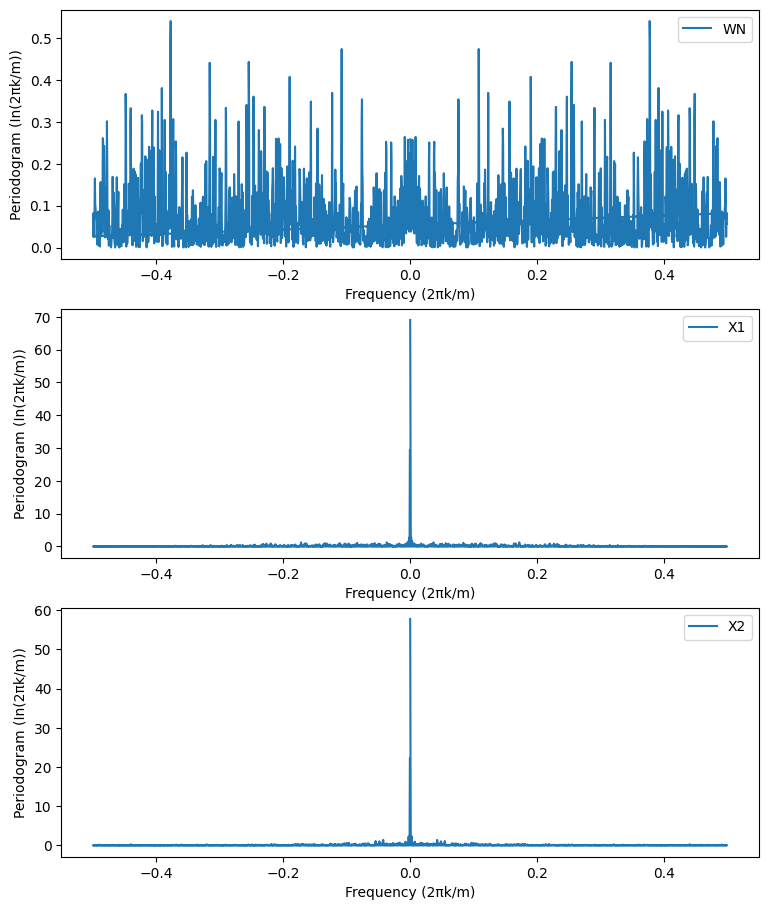

In [23]:
T = 1000
h = 100
mu, sigma = 0, 1
a, b = 1, 1
K = T-1

WN = generate_data_White_noise(T, mu, sigma)
X1 = generate_data_Xt(T, mu, sigma, a, b)
X2 = generate_data_Xt2(T, mu, sigma, a, K)

freq_WN, I_WN = calculate_periodogram(WN,2000)
freq_X1, I_X1 = calculate_periodogram(X1,2000)
freq_X2, I_X2 = calculate_periodogram(X2,2000)

# display and plot
plt.figure(figsize=[9,11])
plt.title('Periodogram of the Time Series')
plt.subplot(3,1,1)
plt.plot(freq_WN,I_WN, label = 'WN')
plt.legend()
plt.xlabel('Frequency (2πk/m)')
plt.ylabel('Periodogram (In(2πk/m))')
plt.subplot(3,1,2)
plt.plot(freq_X1,I_X1, label = 'X1')
plt.legend()
plt.xlabel('Frequency (2πk/m)')
plt.ylabel('Periodogram (In(2πk/m))')
plt.subplot(3,1,3)
plt.plot(freq_X2,I_X2, label = 'X2')
plt.legend()
plt.xlabel('Frequency (2πk/m)')
plt.ylabel('Periodogram (In(2πk/m))')
plt.show()


3. Show that $I_n(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{\gamma}_n(k)e^{-i\lambda k}$

$$
\begin{aligned}
I_n(\lambda) &= \frac{1}{2\pi n} \left| \sum_{k=0}^{n-1}X_k e^{i\lambda k}\right|^2 \\
    &= \frac{1}{2\pi n} \left( \sum_{k=0}^{n-1}X_k e^{i\lambda k} \right) \left( \sum_{h=0}^{n-1}X_h e^{-i\lambda h} \right) \\
    &= \frac{1}{2\pi} \frac{1}{n} \sum_{k=0}^{n-1} \sum_{h=0}^{n-1} X_k X_h e^{i\lambda (k-h)} \\
    &= \frac{1}{2\pi} \sum_{t=0}^{n-1} \hat{\gamma}_n(t) e^{-i\lambda t}
\end{aligned}
$$

4. How to choose $m$ in order to get a simple relation between $\hat{\gamma}_n(k)$ and $I_n(\frac{2\pi k}{m})$ ? At the end, given a specific $\tilde{m}$ show that:
$$
\hat{\gamma}_n(k) = \frac{1}{n} IDFT\left(\left|DFT(X, \tilde{m})\right|^2, \tilde{m}\right)(k)
$$ 
Try this estimator on the autocovariance of previous time series of the first session.


Let $\tilde{m}=2n$, so that
$$
\hat{\gamma}_n(k) = \frac{1}{n} IDFT\left(\left|DFT(X, 2n)\right|^2, 2n\right)(k)
$$ 

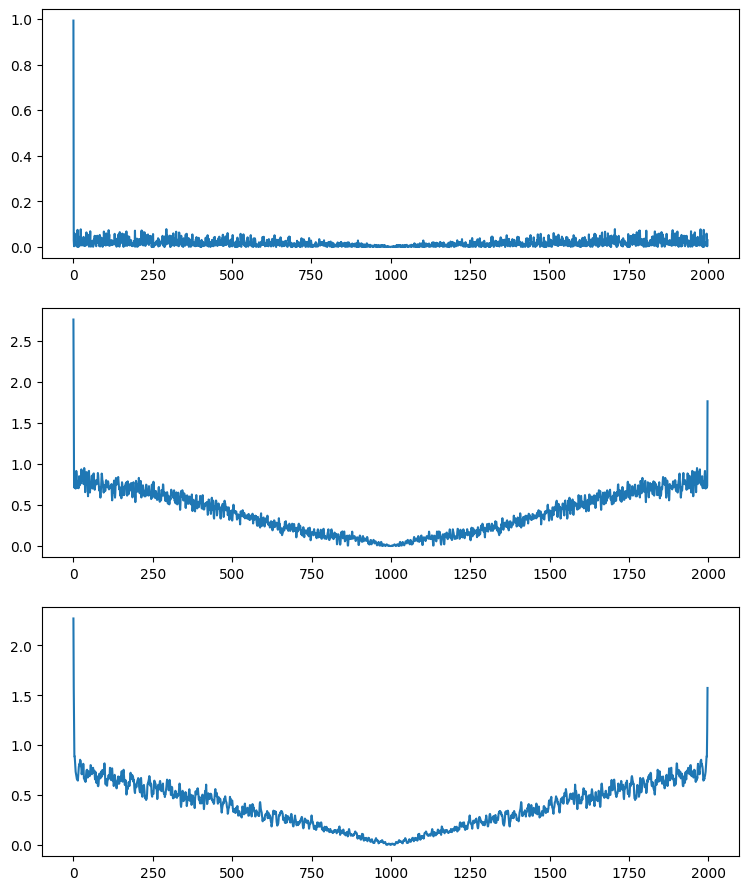

In [20]:
def calculate_gamma(X, m):
    DFT_X = np.fft.fft(X,m)
    IDFT_X = np.fft.ifft(np.abs(DFT_X)**2,m)
    return np.abs(IDFT_X/len(X))
    
gamma_WN = calculate_gamma(WN, 2*len(WN))
gamma_X1 = calculate_gamma(X1, 2*len(X1))
gamma_X2 = calculate_gamma(X2, 2*len(X2))

# display and plot
plt.figure(figsize=[9,11])
plt.subplot(3,1,1)
plt.plot(gamma_WN, label = 'WN')
plt.subplot(3,1,2)
plt.plot(gamma_X1, label = 'X1')
plt.subplot(3,1,3)
plt.plot(gamma_X2, label = 'X2')
plt.show()


5. In the case of white noise, estimate the variance of the periodogram for several values of $n$ and discuss about it.

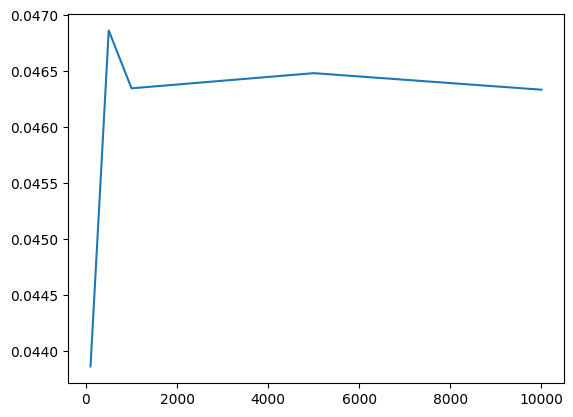

In [21]:
n_values = [100, 500, 1000, 5000, 10000]

variance_estimates = []

for n in n_values:
    data = generate_data_White_noise(n,0,1)
    I_data = calculate_periodogram(data, 2*len(data))
    periodogram_variance = np.var(I_data)
    variance_estimates.append(periodogram_variance)

plt.plot(n_values, variance_estimates)
plt.show()

We find that the estimate of variance is close to 0, which shows that periodogram is stable.